### Ridge Regression for Atmospheric Emissions Prediction
This part of the notebook implements Ridge Regression to predict atmospheric emissions based on traffic flow data.

#### Step 1: Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#### Step 2: Load the Datasets

In [3]:
# load the merged dataframe from the csv file
final_merged_df = pd.read_csv('final_merged_df.csv')

In [4]:
# load the final list of features from the csv file
final_features_df = pd.read_csv('df_final_features_list.csv')

In [5]:
# Display the first few rows
print("Merged Data:\n", final_merged_df.head())
print("\nFinal Features List:\n", final_features_df.head())

Merged Data:
    road_classification  aadt_motorcycle  aadt_taxi  aadt_petrol_car  \
0                    0            112.0       15.0           5470.0   
1                    0             68.0       10.0           3049.0   
2                    0            131.0       15.0           5752.0   
3                    0            178.0       14.0           7280.0   
4                    0            178.0       34.0           8433.0   

   aadt_diesel_car  aadt_electric_car  aadt_petrol_phv  aadt_diesel_phv  \
0           3780.0               32.0             92.0             76.0   
1           2107.0               18.0            339.0            279.0   
2           3976.0               34.0             68.0             56.0   
3           5031.0               43.0            395.0            325.0   
4           5828.0               50.0            217.0            178.0   

   aadt_electric_phv  aadt_petrol_lgv  ...  vkm_hgvs_articulated_6_axles  \
0                1.0            

In [6]:
print("Column Names in final_merged_df:")
print(final_merged_df.columns.tolist())

Column Names in final_merged_df:
['road_classification', 'aadt_motorcycle', 'aadt_taxi', 'aadt_petrol_car', 'aadt_diesel_car', 'aadt_electric_car', 'aadt_petrol_phv', 'aadt_diesel_phv', 'aadt_electric_phv', 'aadt_petrol_lgv', 'aadt_diesel_lgv', 'aadt_electric_lgv', 'aadt_hgvs_rigid_2_axles', 'aadt_hgvs_rigid_3_axles', 'aadt_hgvs_rigid_4_or_more_axles', 'aadt_hgvs_articulated_3_to_4_axles', 'aadt_hgvs_articulated_5_axles', 'aadt_hgvs_articulated_6_axles', 'aadt_buses', 'aadt_coaches', 'vkm_motorcycle', 'vkm_taxi', 'vkm_petrol_car', 'vkm_diesel_car', 'vkm_electric_car', 'vkm_petrol_phv', 'vkm_diesel_phv', 'vkm_electric_phv', 'vkm_petrol_lgv', 'vkm_diesel_lgv', 'vkm_electric_lgv', 'vkm_hgvs_rigid_2_axles', 'vkm_hgvs_rigid_3_axles', 'vkm_hgvs_rigid_4_or_more_axles', 'vkm_hgvs_articulated_3_to_4_axles', 'vkm_hgvs_articulated_5_axles', 'vkm_hgvs_articulated_6_axles', 'vkm_buses', 'vkm_coaches', 'no2_avg', 'pm10_avg', 'pm25_avg', 'co2_avg', 'laei_zone_Inner London', 'laei_zone_Non-GLA', 'laei

#### Step 3: Feature Selection

In [7]:
# final list of features used for training
selected_columns = final_features_df.columns.tolist()
selected_columns

['road_classification',
 'vkm_motorcycle',
 'vkm_taxi',
 'vkm_petrol_car',
 'vkm_diesel_car',
 'vkm_electric_car',
 'vkm_petrol_phv',
 'vkm_diesel_phv',
 'vkm_electric_phv',
 'vkm_petrol_lgv',
 'vkm_diesel_lgv',
 'vkm_electric_lgv',
 'vkm_hgvs_rigid_2_axles',
 'vkm_hgvs_rigid_3_axles',
 'vkm_hgvs_rigid_4_or_more_axles',
 'vkm_hgvs_articulated_3_to_4_axles',
 'vkm_hgvs_articulated_5_axles',
 'vkm_hgvs_articulated_6_axles',
 'vkm_buses',
 'vkm_coaches',
 'laei_zone_Inner London',
 'laei_zone_Non-GLA',
 'laei_zone_Outer London']

In [8]:
# Ensure only selected features are used
X = final_merged_df[selected_columns]

In [9]:
# Define target variables
target_variables = ['co2_avg', 'pm10_avg', 'pm25_avg', 'no2_avg']

In [10]:
# Define target matrix (multi-output regression)
y = final_merged_df[target_variables]

#### Step 4: Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 5: Feature Scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Step 6: Train and Save One Ridge Regression Model for All Emissions

In [13]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [14]:
# Save the trained model
model_filename = "ridge_model_all_emissions.pkl"
joblib.dump((ridge, scaler, target_variables), model_filename)
print(f"Model saved: {model_filename}")

Model saved: ridge_model_all_emissions.pkl


#### Step 7: Load Model and Predict Each Emission Type

In [15]:
# Load the saved model
loaded_ridge, loaded_scaler, loaded_targets = joblib.load(model_filename)
print(f"\n Loaded model for targets: {loaded_targets}")


 Loaded model for targets: ['co2_avg', 'pm10_avg', 'pm25_avg', 'no2_avg']


In [16]:
# Transform test data using saved scaler
X_test_scaled = loaded_scaler.transform(X_test)

In [17]:
# Predict emissions for each target variable
y_pred = loaded_ridge.predict(X_test_scaled)

In [18]:
# Convert predictions to DataFrame for evaluation
y_pred_df = pd.DataFrame(y_pred, columns=loaded_targets, index=y_test.index)

#### Step 8: Model Evaluation for Each Emission


Results for co2_avg:
  - Mean Squared Error (MSE): 6.137783601445267
  - R² Score: 0.9951764945446954


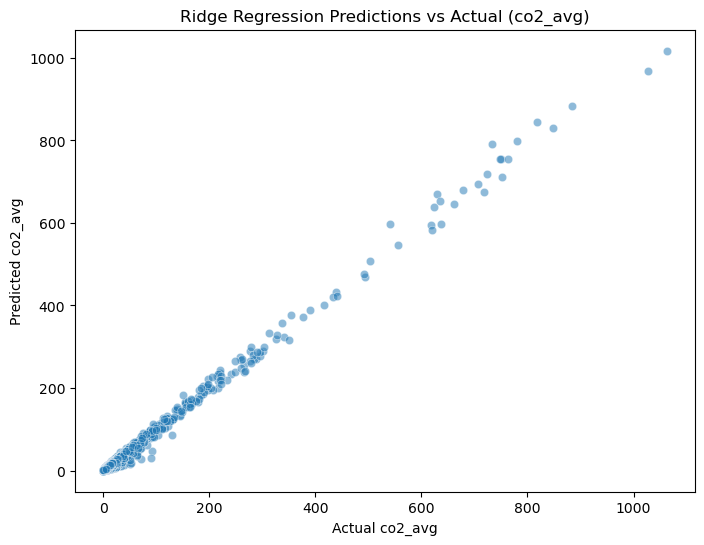


Results for pm10_avg:
  - Mean Squared Error (MSE): 3.2993703812456177e-06
  - R² Score: 0.8881052587020386


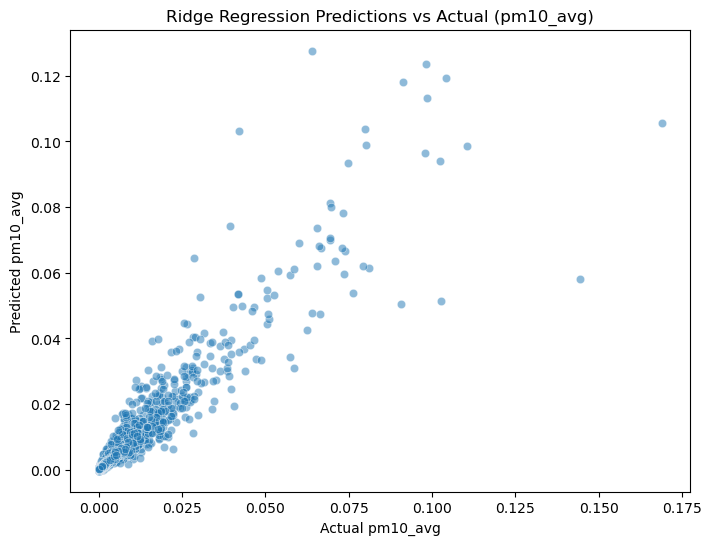


Results for pm25_avg:
  - Mean Squared Error (MSE): 5.716951401252209e-07
  - R² Score: 0.9390582524062981


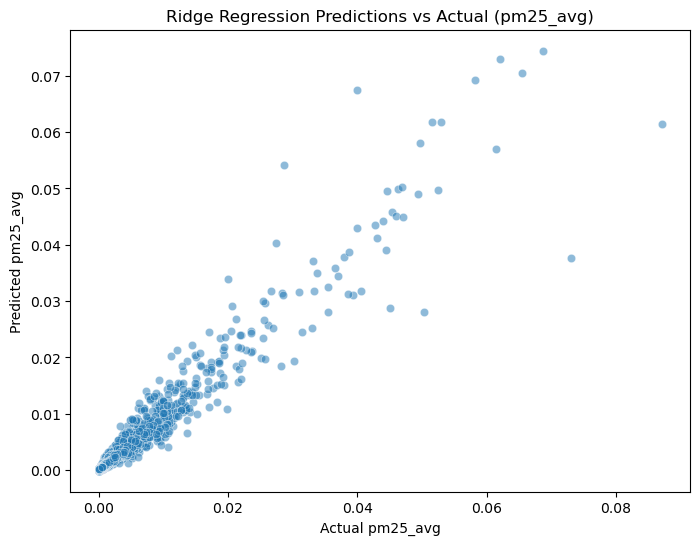


Results for no2_avg:
  - Mean Squared Error (MSE): 5.2244980699696774e-05
  - R² Score: 0.99005165095043


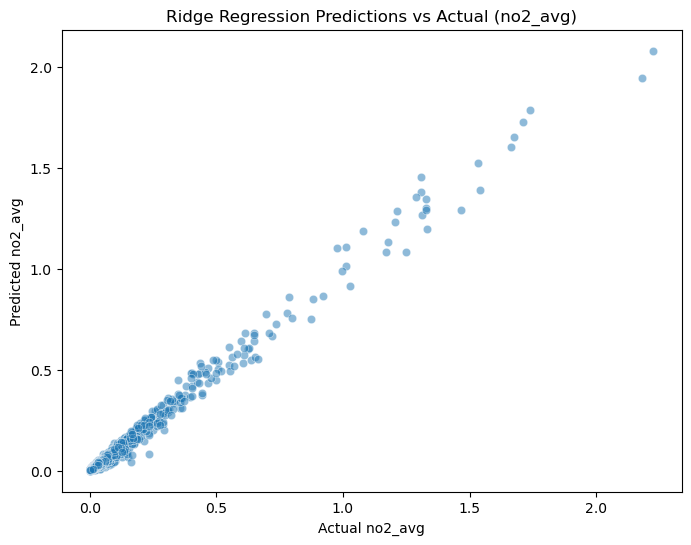

In [19]:
results = {}

for target in loaded_targets:
    mse = mean_squared_error(y_test[target], y_pred_df[target])
    r2 = r2_score(y_test[target], y_pred_df[target])

    print(f"\nResults for {target}:")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - R² Score: {r2}")

    # Store results
    results[target] = {"MSE": mse, "R2": r2}

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test[target], y=y_pred_df[target], alpha=0.5)
    plt.xlabel(f"Actual {target}")
    plt.ylabel(f"Predicted {target}")
    plt.title(f"Ridge Regression Predictions vs Actual ({target})")
    plt.show()


#### Step 9: Display Summary of Results

In [20]:
results_df = pd.DataFrame(results).T
print("\n Final Model Performance Summary:\n", results_df)


 Final Model Performance Summary:
                    MSE        R2
co2_avg   6.137784e+00  0.995176
pm10_avg  3.299370e-06  0.888105
pm25_avg  5.716951e-07  0.939058
no2_avg   5.224498e-05  0.990052


##### Model Performance Summary

###### The model performs exceptionally well for `co2_avg` and `no2_avg`
- **High R² scores (0.995 and 0.990):** The model explains almost all the variance in CO₂ and NO₂ emissions.  
- **Low MSE:** The prediction errors are minimal.  

######  Slightly weaker performance for `pm10_avg`
- **R² = 0.888:** Still a strong model but not as perfect as CO₂ and NO₂.  
- **Potential reason:** `PM10` emissions might have more variability, meaning linear relationships (like Ridge Regression) might not capture all patterns.  

######  `pm25_avg` also performs well
- **R² = 0.939:** The model explains ~94% of the variance in PM2.5 emissions.  
- **Very low MSE (`5.7e-07`)** suggests accurate predictions with minor errors.  

#### Step 10: Feature Importance

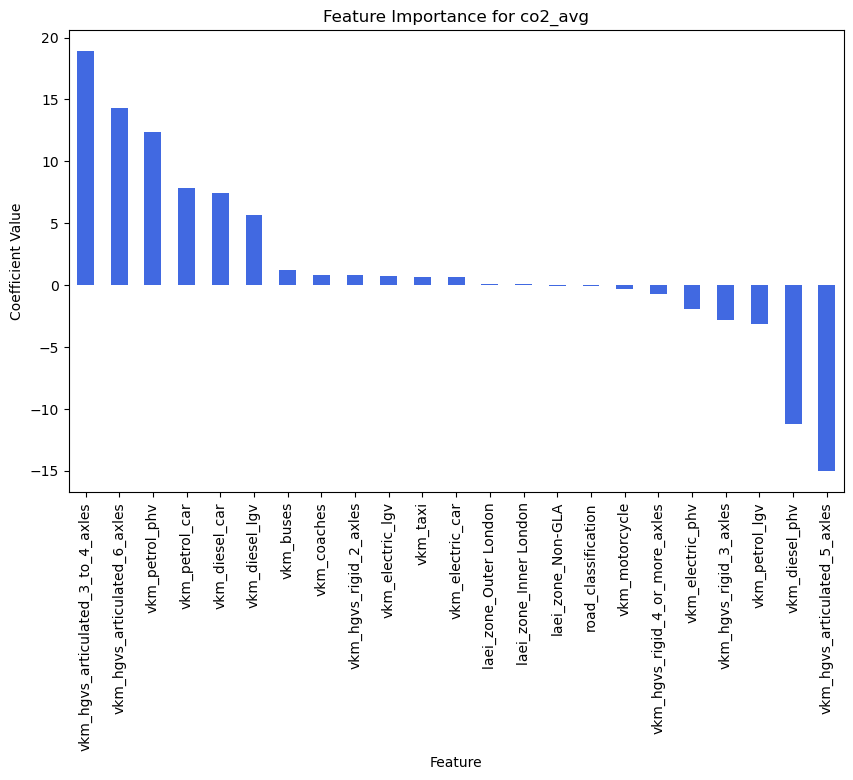

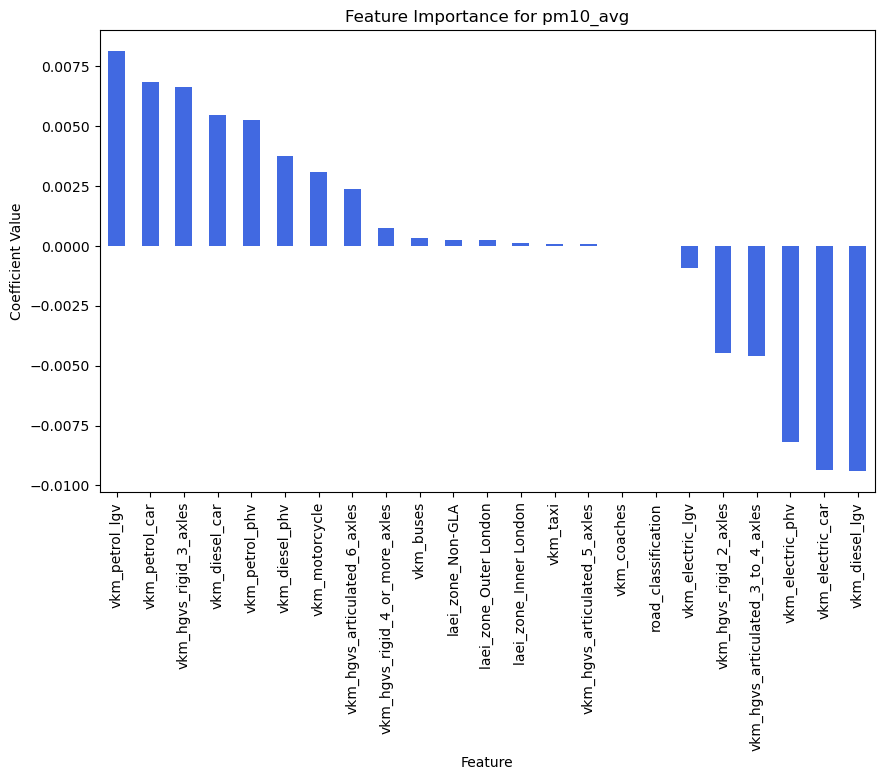

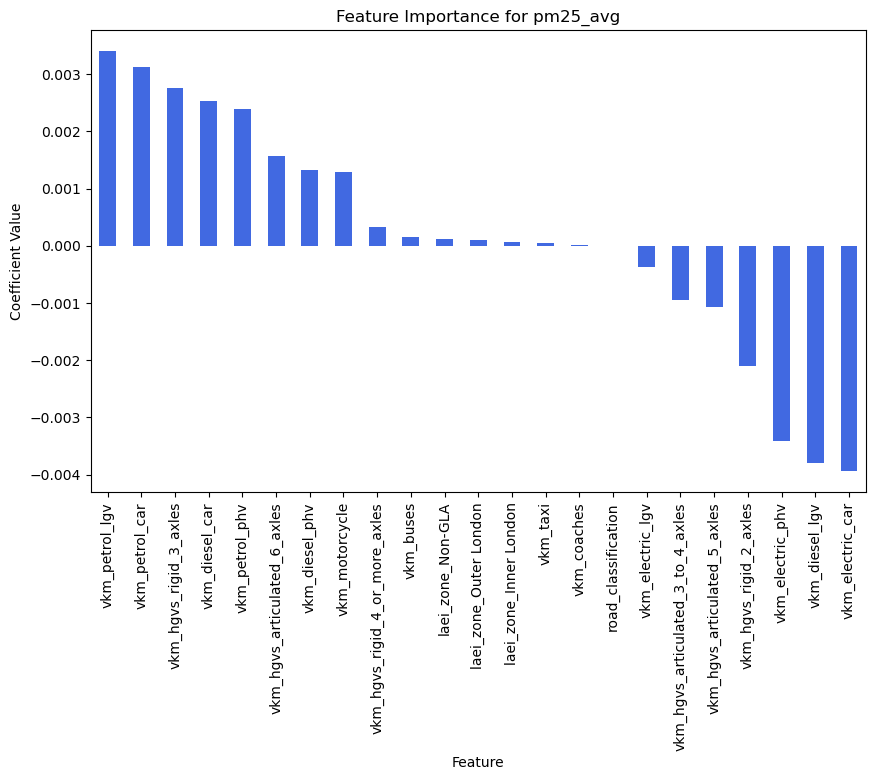

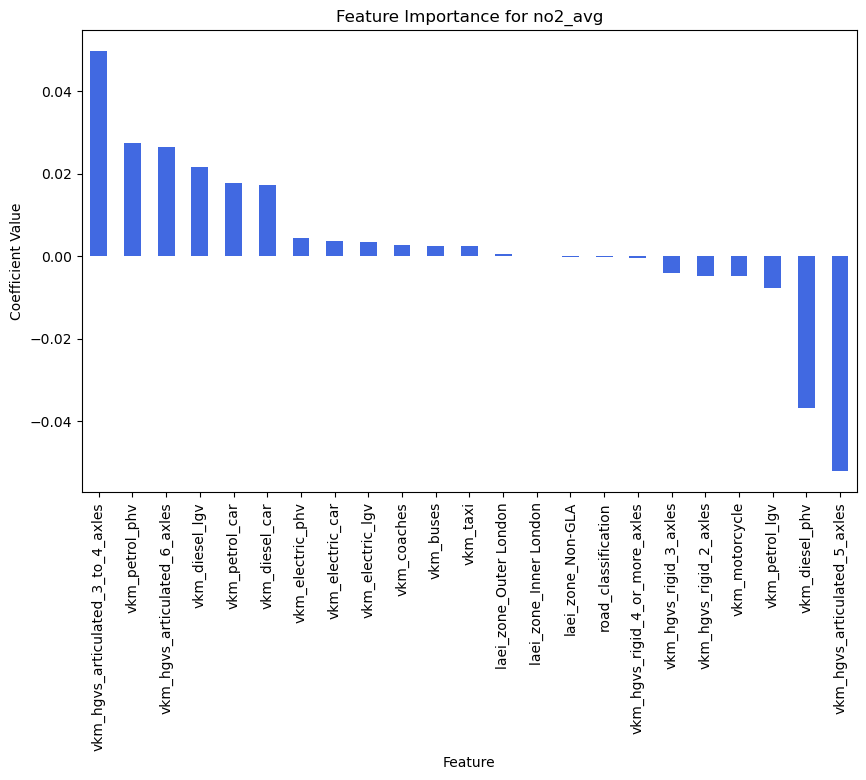

In [21]:
# Extract feature importance from trained Ridge model
feature_importance = pd.DataFrame(loaded_ridge.coef_, columns=X.columns, index=loaded_targets)

# Plot feature importance for each emission type
for target in loaded_targets:
    plt.figure(figsize=(10, 6))
    sorted_coeffs = feature_importance.loc[target].sort_values(ascending=False)
    sorted_coeffs.plot(kind="bar", color="royalblue")
    plt.title(f"Feature Importance for {target}")
    plt.xlabel("Feature")
    plt.ylabel("Coefficient Value")
    plt.xticks(rotation=90)
    plt.show()

### Final Takeaways

- HGVs & diesel vehicles are major contributors to CO₂ and NO₂ emissions.
- Petrol cars and motorcycles significantly impact PM10 and PM2.5 emissions.
- Electric vehicles show expectedly low/no contribution, reinforcing their emission reduction benefits.
- Some HGV categories show negative correlations, likely due to emission controls.

#### Step 11: Hyperparameter Tuning (alpha in Ridge Regression)

In [22]:
# Define the parameter grid for alpha tuning
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search with Cross-Validation
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring="r2", cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = ridge_cv.best_params_["alpha"]
print(f"Best Alpha Value: {best_alpha}")

# Train Ridge Regression using the optimized alpha
optimized_ridge = Ridge(alpha=best_alpha)
optimized_ridge.fit(X_train_scaled, y_train)

# Save the optimized model
joblib.dump((optimized_ridge, scaler, target_variables), "optimized_ridge_model.pkl")
print("Optimized Ridge model saved.")

Best Alpha Value: 1
Optimized Ridge model saved.


- Since 1 seems to be the best value for alpha already, we already evaluated the optimised model.